This notebooks contains EDA of the credit-card-approval-prediction datasets. Further preprocessing steps will be in another notebook.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
application = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
credit = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')

In [3]:
len(set(application['ID'])) #this is how many people are unique in application 438510

438510

In [4]:
len(set(credit['ID'])) #unique in credit 

45985

In [5]:
len(set(application['ID']).intersection(set(credit['ID']))) # how many IDs do two tables share

36457

In [6]:
# only analyze in the intersection cases between 2 dataset
ids = set(application['ID']).intersection(set(credit['ID']))
application = application[application['ID'].isin(ids)]
credit = credit[credit['ID'].isin(ids)]

In [7]:
def barplot(label,value,title='',normalize=False):
    fig = plt.figure(figsize=(len(value)*2,5))
    ax = fig.add_subplot()
    if normalize:
        ax.bar(label, value/value.sum()*100)
    else:
        ax.bar(label,value)
    ax.set_title(title)

def histogram(value, bins=10, title='',normalize=False):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()
    
    ax.hist(value, bins=bins)
    ax.set_title(title)


# **APPLICATION RECORD**

In [8]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

! Need to handle null values for OCCUPATION_TYPE

**Categorical**

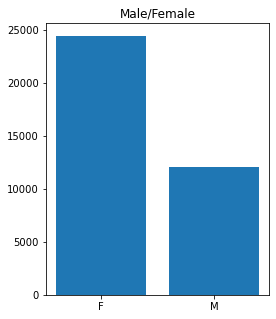

In [9]:
x = application['CODE_GENDER'].value_counts()
barplot(x.index,x,'Male/Female')

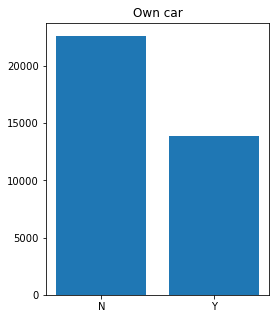

In [10]:
x = application['FLAG_OWN_CAR'].value_counts()
barplot(x.index,x, 'Own car')

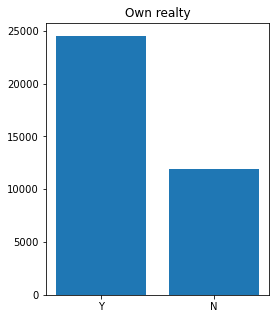

In [11]:
x = application['FLAG_OWN_REALTY'].value_counts()
barplot(x.index,x,'Own realty')

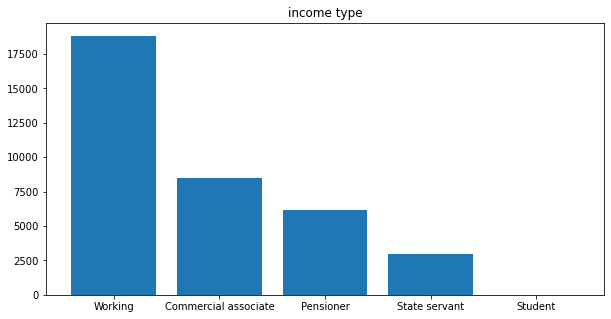

In [12]:
x = application['NAME_INCOME_TYPE'].value_counts()
barplot(x.index,x,'income type')

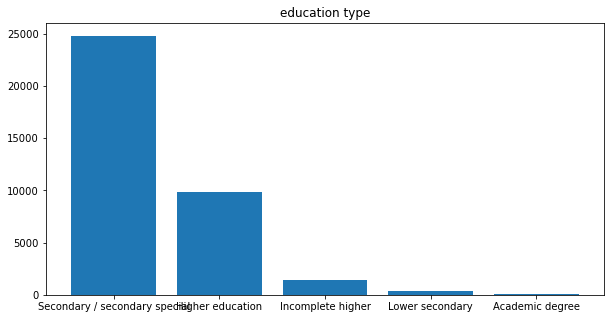

In [13]:
x = application['NAME_EDUCATION_TYPE'].value_counts()
barplot(x.index,x,'education type')

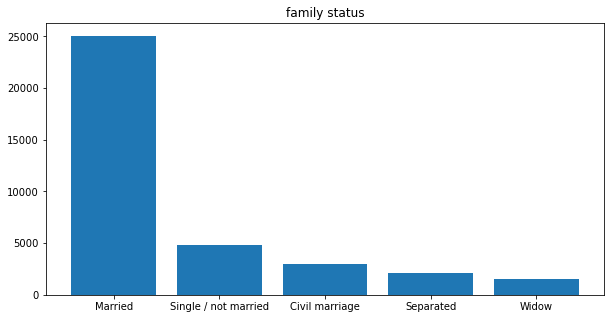

In [14]:
x = application['NAME_FAMILY_STATUS'].value_counts()
barplot(x.index,x,'family status')

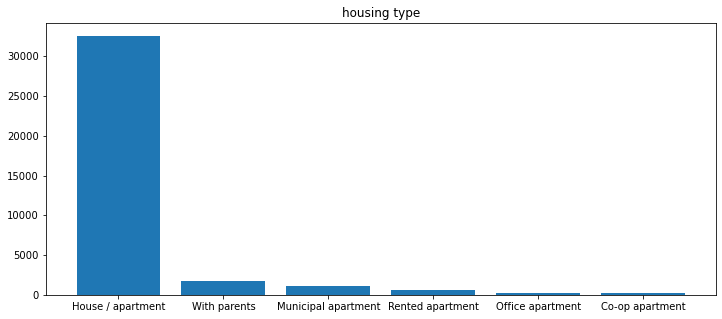

In [15]:
x = application['NAME_HOUSING_TYPE'].value_counts()
barplot(x.index,x,'housing type')

In [16]:
pd.DataFrame(application['OCCUPATION_TYPE']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OCCUPATION_TYPE  25134 non-null  object
dtypes: object(1)
memory usage: 569.6+ KB


There are null values for OCCUPATION_TYPE

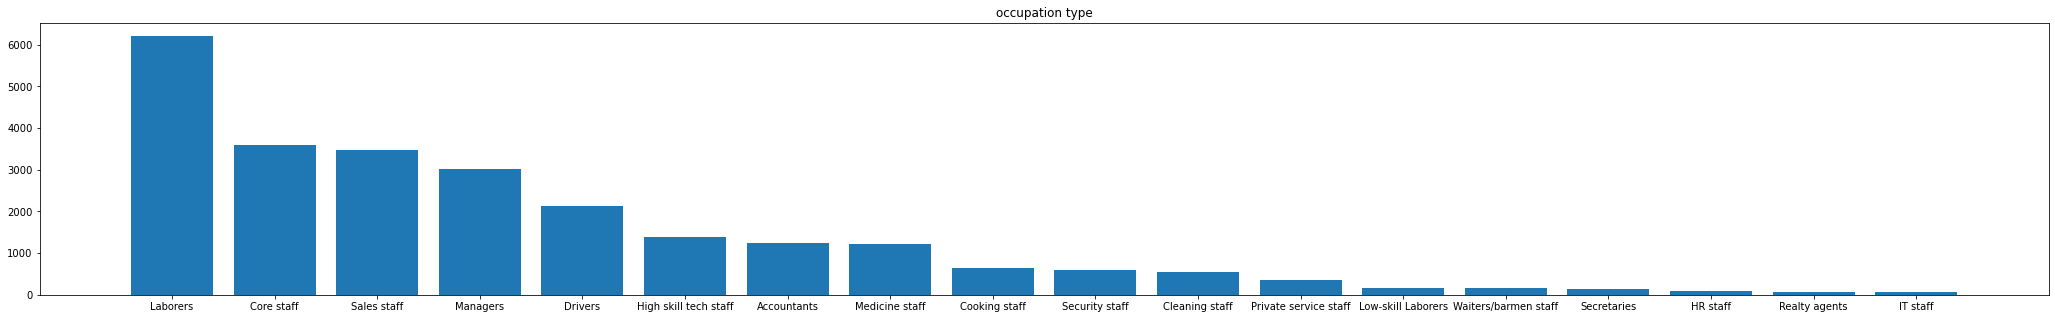

In [17]:
x = application['OCCUPATION_TYPE'].value_counts()
barplot(x.index,x,'occupation type')

Although the last few values are very small compared to the others, they may add some value to the model and not cause any overfit. However, when we convert these into dummy vairables, there'll be 18 more columns, which can be expensive. Therefore, combine the last few values into one generic value ("others") can be one of our options. 

In [18]:
application['FLAG_MOBIL'].value_counts()

# => everyone owns a mobile phone. Therefore, this column won't add any value and can be dropped.

1    36457
Name: FLAG_MOBIL, dtype: int64

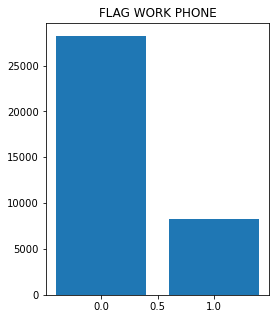

In [19]:
x = application['FLAG_WORK_PHONE'].value_counts()
barplot(x.index,x, title='FLAG WORK PHONE')

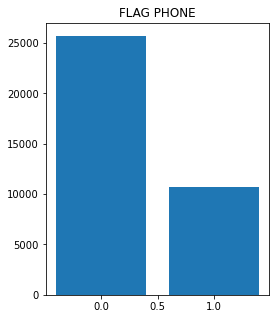

In [20]:
x = application['FLAG_PHONE'].value_counts()
barplot(x.index,x, title='FLAG PHONE')

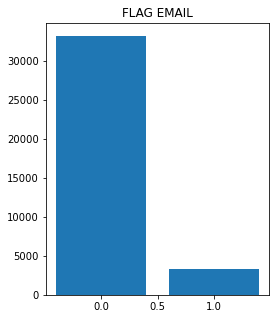

In [21]:
x = application['FLAG_EMAIL'].value_counts()
barplot(x.index, x, title='FLAG EMAIL')

**Quantitative**

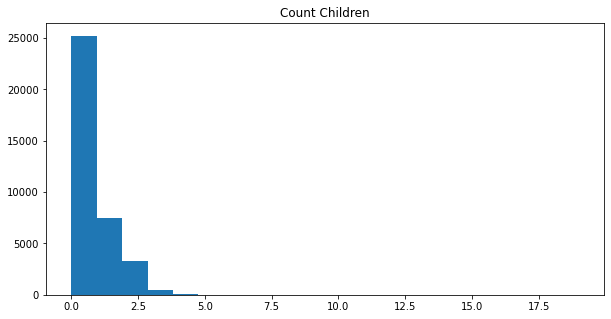

In [22]:
histogram(application['CNT_CHILDREN'], bins=20, title='Count Children')

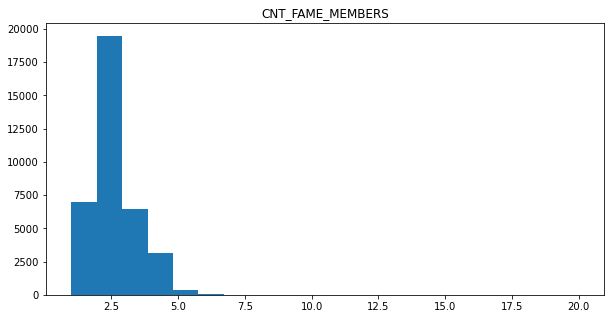

In [23]:
histogram(application['CNT_FAM_MEMBERS'], bins=20, title='CNT_FAME_MEMBERS')

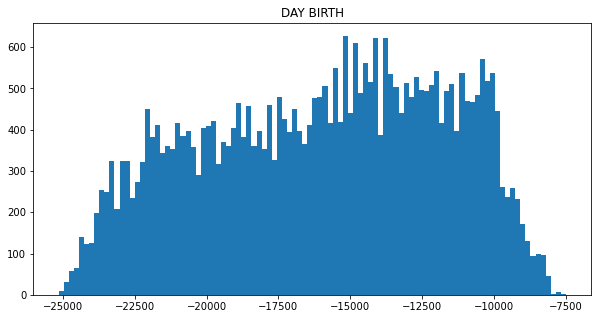

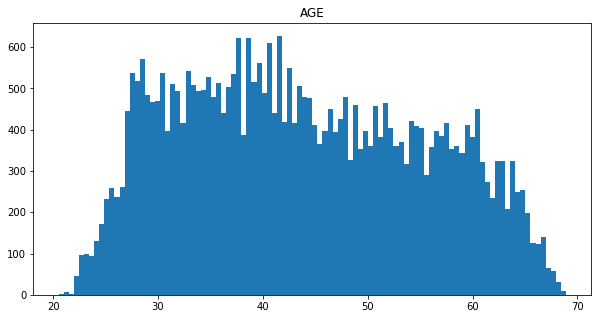

In [24]:
histogram(application['DAYS_BIRTH'],bins=100, title='DAY BIRTH')

# converting days_birth to age for easier intepretation, the plot is flipped horizontally due to days_birth is negative, while age is positive
histogram(-application['DAYS_BIRTH']/365, bins=100, title='AGE')

The distribution seems normal

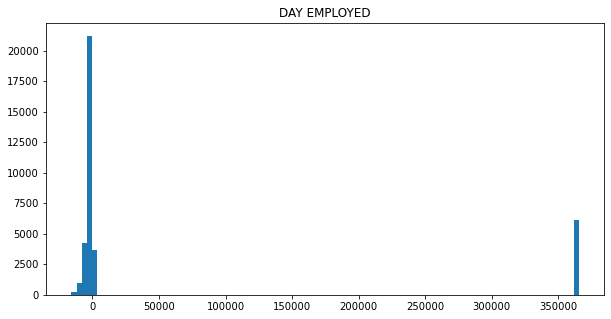

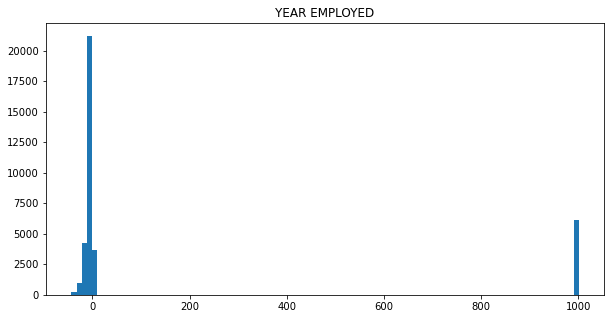

In [25]:
histogram(application['DAYS_EMPLOYED'],bins=100, title='DAY EMPLOYED')

# converting to year for easier intepretation
histogram(application['DAYS_EMPLOYED']/365,bins=100, title='YEAR EMPLOYED')

This does not mean that there are people who have been employed for 1000 years!
According to the dataset description. Count backwards from current day(0). If positive, it means the person currently unemployed.
Let's plot days_employed again after removing the unemployed ones.

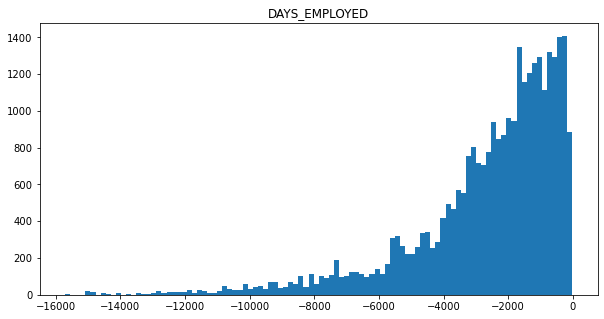

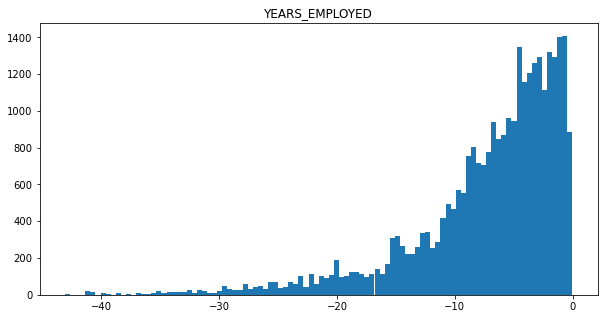

In [26]:
histogram(application[application['DAYS_EMPLOYED']<=0]['DAYS_EMPLOYED'], bins=100, title='DAYS_EMPLOYED')
histogram(application[application['DAYS_EMPLOYED']<=0]['DAYS_EMPLOYED']/365, bins=100, title='YEARS_EMPLOYED')

# **CREDIT RECORD**

In [27]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 92938 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              777715 non-null  int64 
 1   MONTHS_BALANCE  777715 non-null  int64 
 2   STATUS          777715 non-null  object
dtypes: int64(2), object(1)
memory usage: 23.7+ MB


In [ ]:
# TODO: Analyzing MONTHS_BALANCE and STATUS

# **OTHERS**

In [28]:
# TODO: Plot correlation chart

# **TO DO FOR DATA PREPROCESSING**

* Drop all cases that are not shared between two datasets before processing any data
* Handle null values in OCCUPATION_TYPE
* Consider merging the last few values of OCCUPATION_TYPE to some generic value ("others")
* Handle unemployed cases in DAYS_EMPLOYED (we can probably make another binary column to specify whether they are employed or not
* Research if skewed distribution in DAYS_EMPLOYED, COUNT_CHILDREN, COUNT_FAM_MEMBERS can affect the model, if yes, use log distribution
* Handle multicolinearity after plotting out the ocrrelation chart
* Consider using WOE to remove columns that have low weights
* For credit dataset, classify them into good/bad customers
* Encode variables